In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import seaborn as sns

/Users/iffy/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/iffy/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [8]:
df= pd.read_csv('molecule_complete.csv')
df= df.sample(frac=0.6, random_state=1)

In [9]:
df

,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,potential_energy,X,Y,Z,XX_atom1,...,pso,dso,atom_atom1_structure,x_atom1_structure,y_atom1_structure,z_atom1_structure,atom,x,y,z
2557043,dsgdb9nsd_077434,12,0,3JHC,2.373650,-435.3620,-0.5735,1.5879,1.5065,29.5177,...,-0.033082,0.092030,H,1.012358,-0.434000,-1.768450,C,0.134163,1.500533,-0.002624
1571490,dsgdb9nsd_051037,10,11,2JHH,-9.315790,-421.9332,3.8488,1.0868,1.1443,26.8083,...,1.903460,-2.072480,H,0.000132,4.097465,1.845541,H,1.154012,2.780651,2.198973
3815279,dsgdb9nsd_108569,15,5,3JHC,2.513960,-459.0387,-1.4529,0.2637,2.3221,28.5014,...,0.307475,-0.553075,H,-1.525845,-1.196715,-2.182229,C,-3.216152,-1.928110,0.245447
3327074,dsgdb9nsd_095947,14,5,3JHC,0.266218,-460.3333,1.2291,1.1581,1.5971,30.2074,...,0.194738,-0.268798,H,2.074233,-0.989304,-1.401517,C,0.813574,-0.516172,1.299916
842927,dsgdb9nsd_029299,13,16,3JHH,7.784940,-418.1772,-1.7444,2.2403,-0.0005,35.8985,...,0.437421,-0.451560,H,1.666027,-5.174498,1.112981,H,0.209844,-4.427427,3.061375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360887,dsgdb9nsd_044137,12,4,2JHC,6.250570,-437.9458,-0.4541,1.1457,1.3834,30.0977,...,-0.094027,0.028242,H,0.631578,-0.977644,2.445789,C,-0.543177,-2.197771,1.049977
618867,dsgdb9nsd_019557,15,1,3JHC,2.363560,-383.7912,0.2908,-1.4011,1.0320,24.7886,...,0.047198,-0.097584,H,-2.353718,-0.757403,-2.016324,C,0.075366,-0.019583,0.092127
3476205,dsgdb9nsd_100329,18,3,3JHC,5.718420,-404.5553,-4.3745,-0.6090,1.5287,31.2353,...,0.262286,-0.400916,H,0.301065,1.165452,-2.533533,C,0.574203,-2.048170,-1.252173
974728,dsgdb9nsd_034215,14,6,2JHC,3.654060,-420.6905,0.2620,1.7771,-0.5548,26.8664,...,0.187659,-0.239810,H,0.427855,2.083796,-2.183343,C,1.220648,2.398020,-0.004498


In [29]:
df.columns

Index(['molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'potential_energy', 'X', 'Y', 'Z',
       'XX_atom1', 'YX_atom1', 'ZX_atom1', 'XY_atom1', 'YY_atom1', 'ZY_atom1',
       'XZ_atom1', 'YZ_atom1', 'ZZ_atom1', 'XX', 'YX', 'ZX', 'XY', 'YY', 'ZY',
       'XZ', 'YZ', 'ZZ', 'mulliken_charge_atom1', 'mulliken_charge',
       'type_scc', 'fc', 'sd', 'pso', 'dso', 'atom_atom1_structure',
       'x_atom1_structure', 'y_atom1_structure', 'z_atom1_structure', 'atom',
       'x', 'y', 'z'],
      dtype='object')

In [31]:
columnlist= ['scalar_coupling_constant', 'mulliken_charge', 'fc', 'sd', 'pso', 'dso']

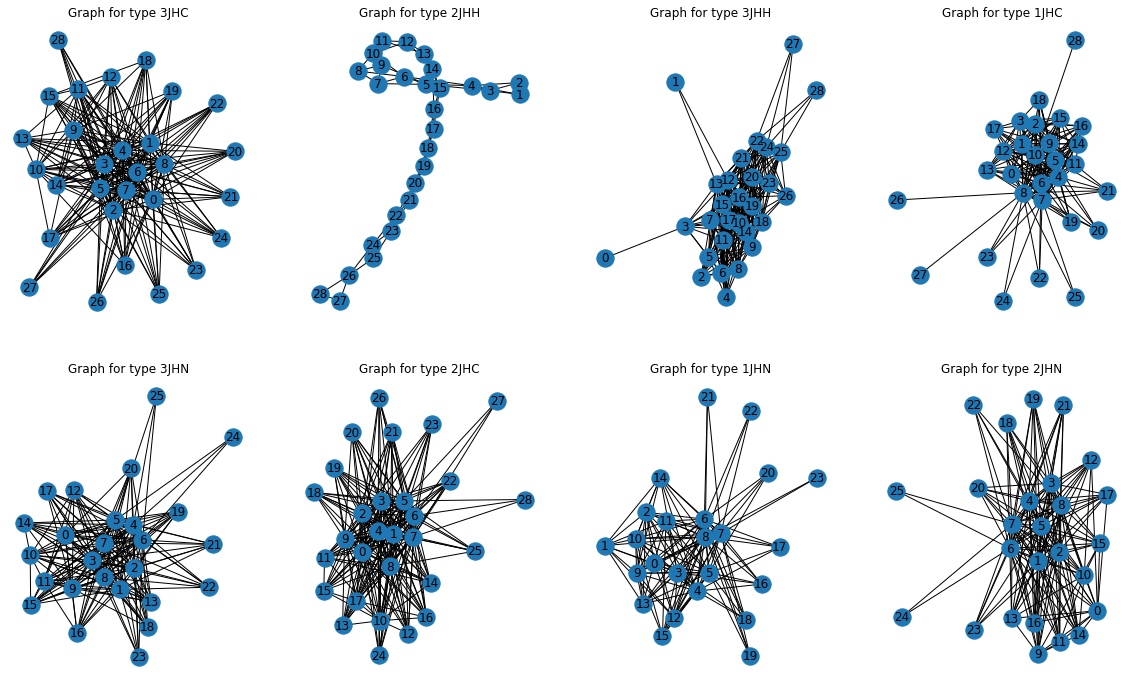

In [24]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['scalar_coupling_constant'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

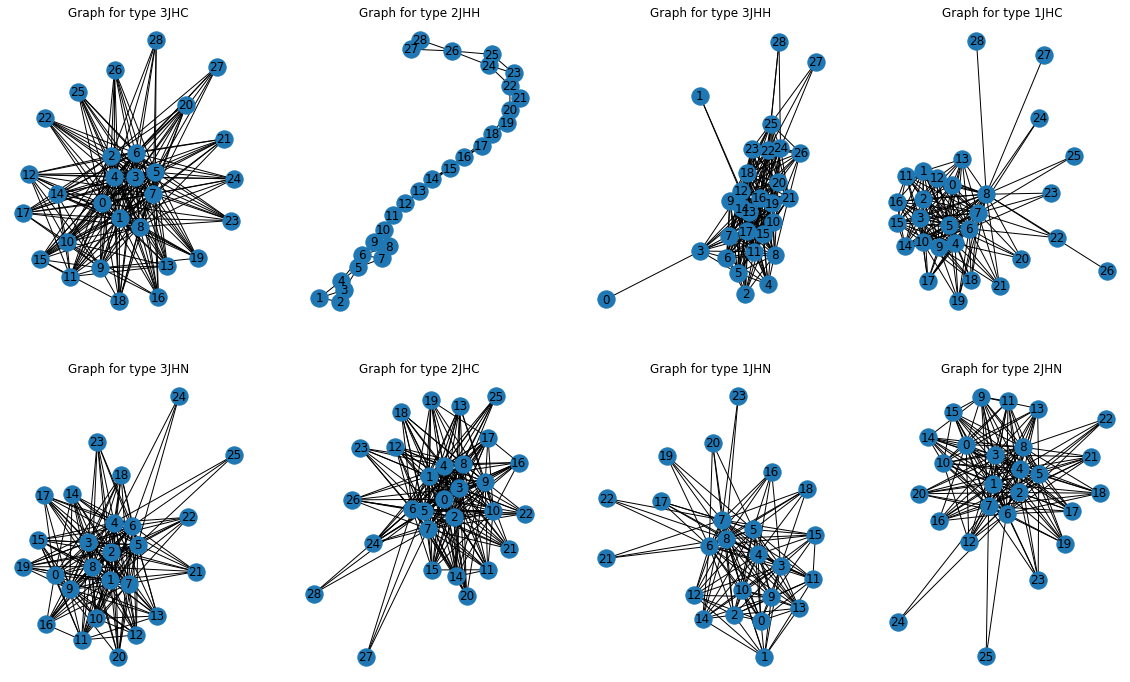

In [27]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['pso'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

/Users/iffy/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


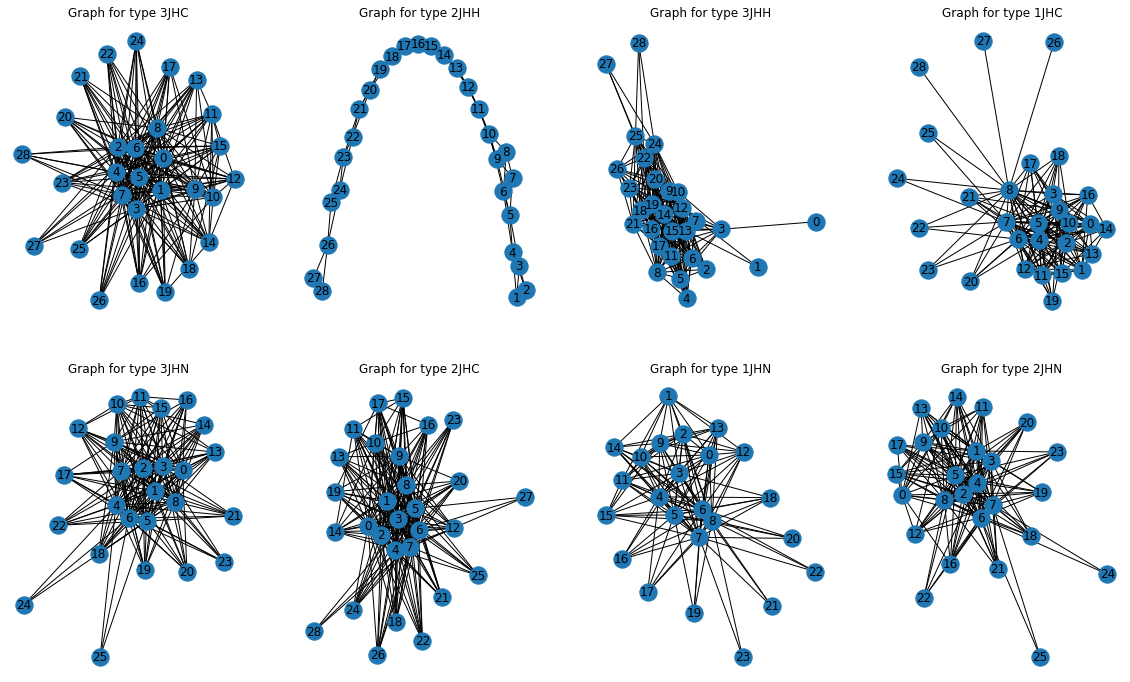

In [30]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['mulliken_charge'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

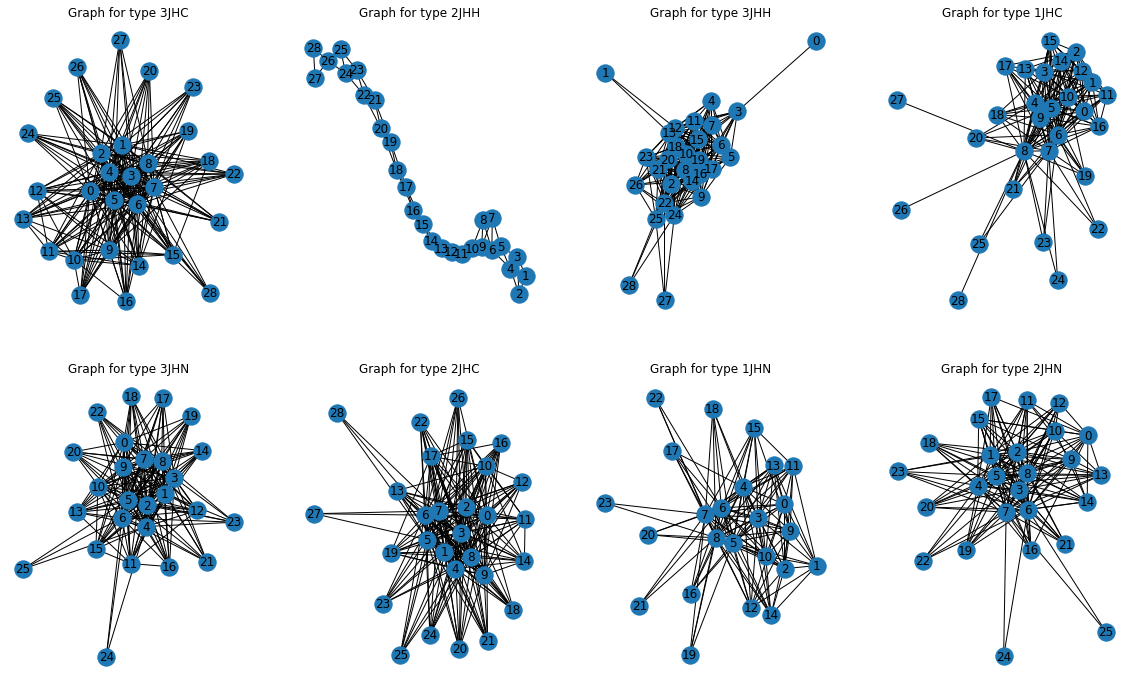

In [35]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['fc'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

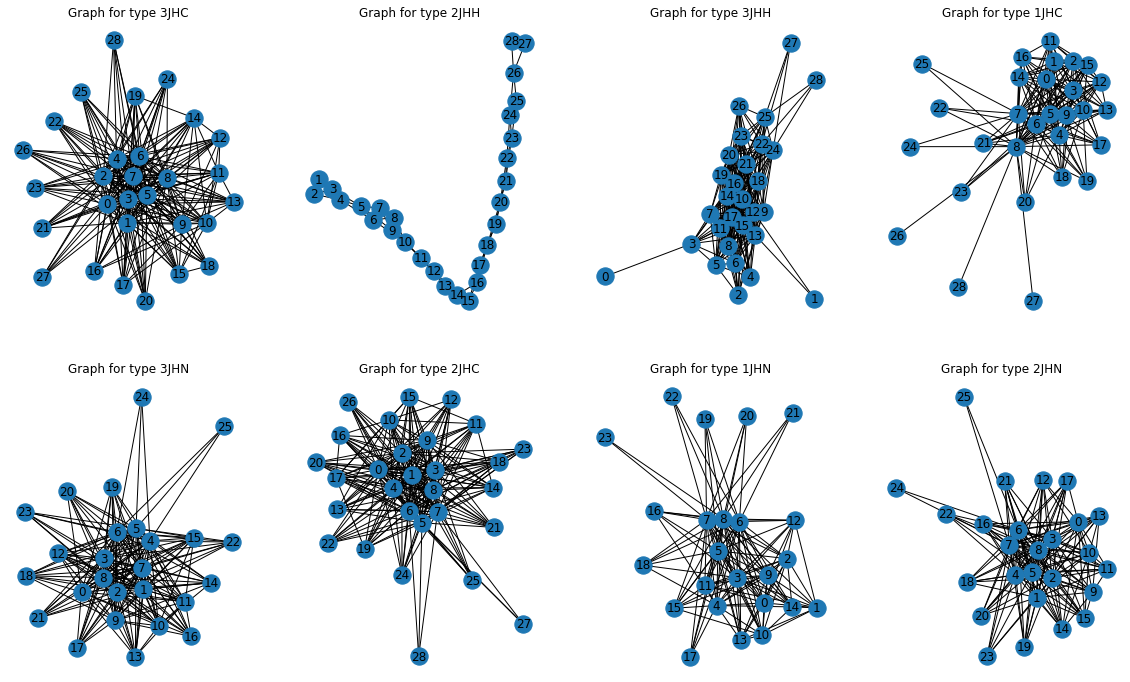

In [36]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['sd'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

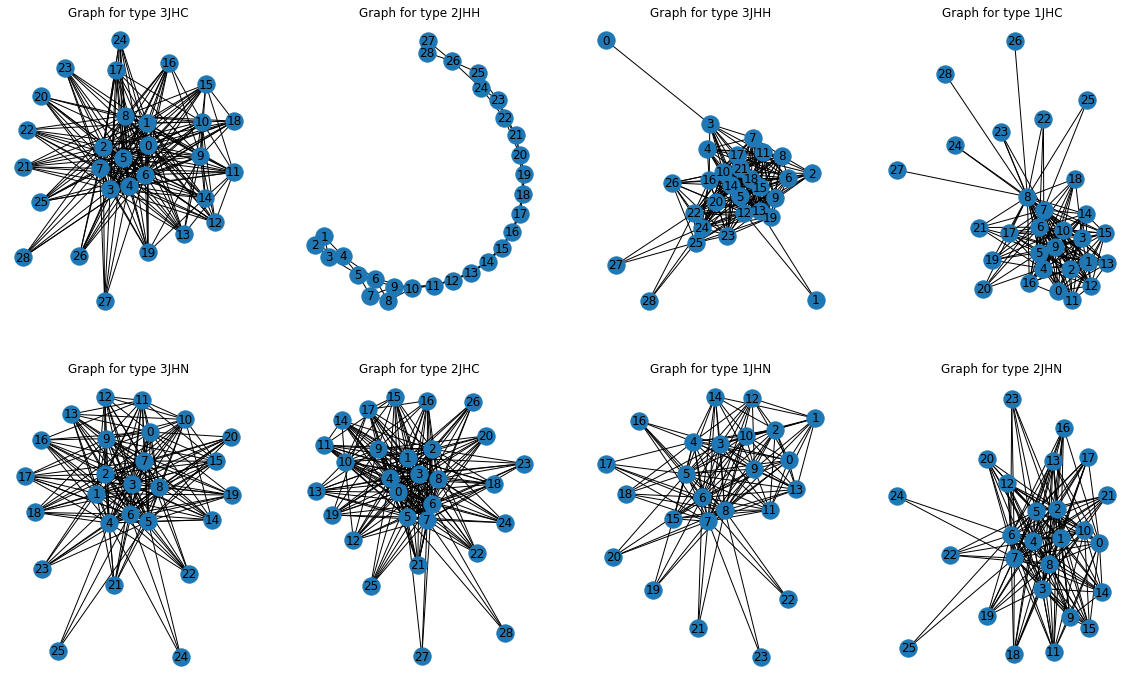

In [37]:
fig, ax = plt.subplots(figsize = (20, 12))
for i, t in enumerate(df['type'].unique()):
    df_type = df.loc[df['type'] == t]
    G = nx.from_pandas_edgelist(df_type, 'atom_index_0', 'atom_index_1', ['dso'])
    plt.subplot(2, 4, i + 1);
    nx.draw(G, with_labels=True);
    plt.title(f'Graph for type {t}')

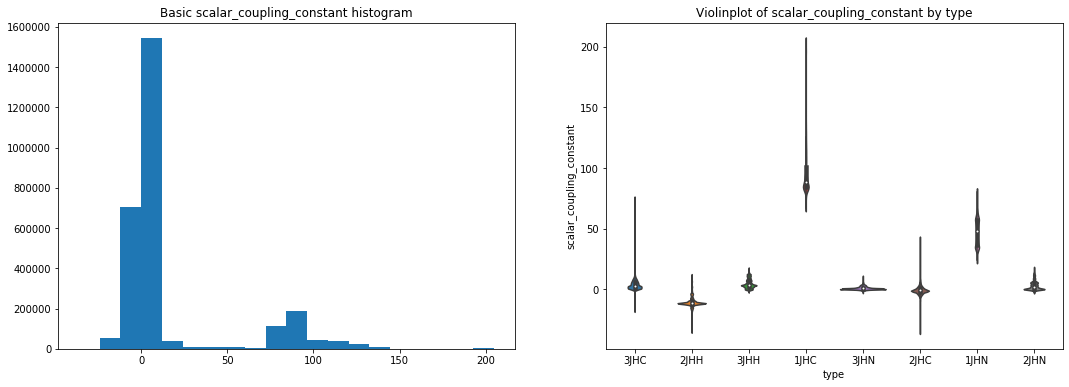

In [40]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(df['scalar_coupling_constant'], bins=20);
plt.title('Basic scalar_coupling_constant histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='scalar_coupling_constant', data=df);
plt.title('Violinplot of scalar_coupling_constant by type');

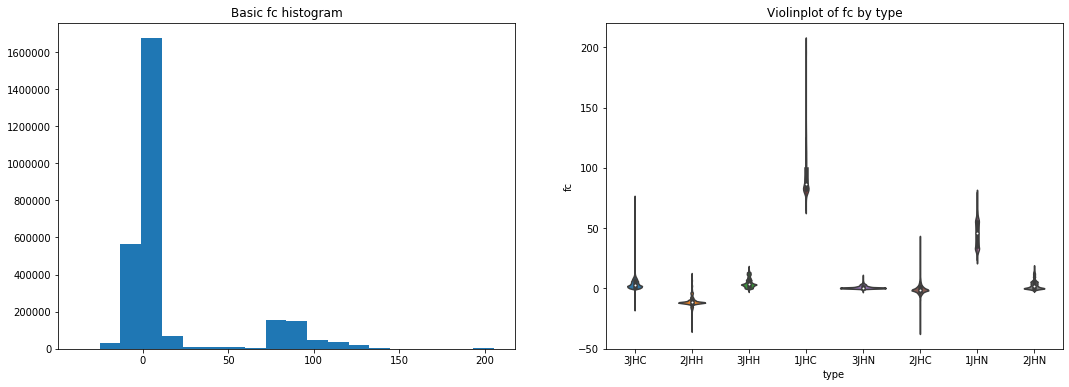

In [42]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(df['fc'], bins=20);
plt.title('Basic fc histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='fc', data=df);
plt.title('Violinplot of fc by type');

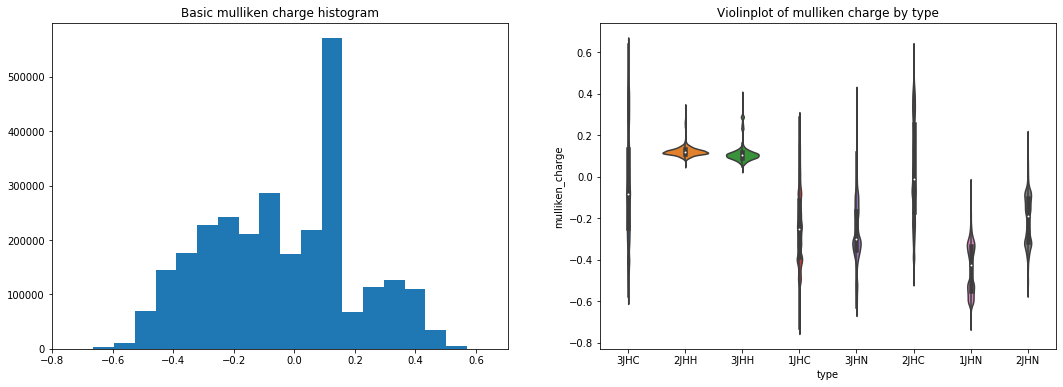

In [43]:
fig, ax = plt.subplots(figsize = (18, 6))
plt.subplot(1, 2, 1);
plt.hist(df['mulliken_charge'], bins=20);
plt.title('Basic mulliken charge histogram');
plt.subplot(1, 2, 2);
sns.violinplot(x='type', y='mulliken_charge', data=df);
plt.title('Violinplot of mulliken charge by type');